<a href="https://colab.research.google.com/github/PreetiRonghe/Datascience/blob/main/Day11_EDA_userDef_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#outlier Detection
#1.histogram
#2.Boxplot
#Descriptive statistics
#Bar Plot for categorical Column

In [ ]:
 #Capping - Replacing Outliers with upper extreme or lower extreme is called capping


In [3]:
def Userfunction():
  print("Hello")
  print("how are you")
  print("bye")

In [4]:
Userfunction()

Hello
how are you
bye


In [5]:
Userfunction(10)

TypeError: Userfunction() takes 0 positional arguments but 1 was given

In [6]:
len()

TypeError: len() takes exactly one argument (0 given)

In [7]:
len("Preeti")

6

In [9]:
def add(num1,num2):
  add=num1+num2
  print(add)

In [10]:
add()

TypeError: add() missing 2 required positional arguments: 'num1' and 'num2'

In [11]:
add(5,6)

11


In [12]:
def arithmatic(num1,num2):
  add=num1+num2
  sub=num1-num2
  mul=num1*num2
  div=num1/num2
  print(add)
  print(sub)
  print(mul)
  print(div)

In [13]:
arithmatic(10,5)

15
5
50
2.0


In [14]:
def arithmatic(num1,num2):
  add=num1+num2
  sub=num1-num2
  mul=num1*num2
  div=num1/num2
  return add,sub,mul,div

In [15]:
arithmatic(10,5)

(15, 5, 50, 2.0)

In [16]:
"data"+"Science"

'dataScience'

In [17]:
"data"+" "+"Science"

'data Science'

In [18]:
def addText(text1,text2):
  print(text1+""+text2)

In [19]:
addText("Data","Science")

DataScience


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv("/content/data_clean.csv")

In [48]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [49]:
df['Ozone'].quantile(0.25)

np.float64(18.0)

In [50]:
df['Ozone'].quantile(0.75)

np.float64(61.5)

In [25]:
#Outlier Detection:User Defined function to calculate upper extreme and lower extreme for multiple columnname
def outlier_detection(df,columnname):
    Q1=df[columnname].quantile(0.25)
    Q3=df[columnname].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    return lower_extreme,upper_extreme,IQR,Q1,Q3

In [51]:
outlier_detection(df,'Ozone')

(np.float64(-47.25),
 np.float64(126.75),
 np.float64(43.5),
 np.float64(18.0),
 np.float64(61.5))

In [27]:
outlier_detection(df,'Solar.R')


(np.float64(-88.0),
 np.float64(464.0),
 np.float64(138.0),
 np.float64(119.0),
 np.float64(257.0))

In [28]:
outlier_detection(df,'Wind')

(np.float64(0.6875000000000009),
 np.float64(18.5875),
 np.float64(4.475),
 np.float64(7.4),
 np.float64(11.875))

In [54]:
#if the outliers is greater than upper extreme, replace them with Upper extreme
df[df['Ozone']>126.75]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
61,62,135.0,269.0,4.1,84,7,1,2010,84,S
116,117,168.0,238.0,3.4,81,8,25,2010,81,PS


In [55]:
#This command is used to find the outliers
df[df['Ozone']>126.75].shape[0]

2

In [56]:
#This command is used to find the outliers
len(df[df['Ozone']>126.75])

2

In [57]:
df.loc[df['Ozone']>126.5,'Ozone']=126.75

In [58]:
df[df['Ozone']>126.75]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [59]:
df['Ozone']

,Ozone
0,41.0
1,36.0
2,12.0
3,18.0
4,NaN
...,...
153,41.0
154,30.0
155,NaN
156,14.0


In [60]:
df['Ozone'].describe()

,Ozone
count,120.000000
mean,41.170833
std,31.276434
min,1.000000
25%,18.000000
50%,30.500000
75%,61.500000
max,126.750000


In [63]:
#here there are null values in Ozone while will have to be replaced by median or mean

In [62]:
#scatterplot helps in predicting the correlation between the variables
#If we have a familiar dataset like employees, we know what all variables help determine the salary, so looking at the data itself we can tell that
#however if we are looking at a medical dataset , where we do not have the knowledge, we will require scatterplot to define the correlation, dependent variable on y axis

In [64]:
#Correlation Coefficient
df.corr(numeric_only=True)
#ozone vs ozone correlation is 1, bit it is of no use so ignore diagonal values
#ozone vs temperature correlation is 0.66 i.e positive moderate correlation
#for large number of columns just check heatmap

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
Unnamed: 0,1.000000,0.123555,-0.109520,-0.158309,0.216219,NaN,0.337537
Ozone,0.123555,1.000000,0.355052,-0.595418,-0.044443,NaN,0.718523
Solar.R,-0.109520,0.355052,1.000000,-0.056594,-0.154212,NaN,0.273322
Wind,-0.158309,-0.595418,-0.056594,1.000000,0.040151,NaN,-0.441247
Day,0.216219,-0.044443,-0.154212,0.040151,1.000000,NaN,-0.124538
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.337537,0.718523,0.273322,-0.441247,-0.124538,NaN,1.000000


<Axes: >

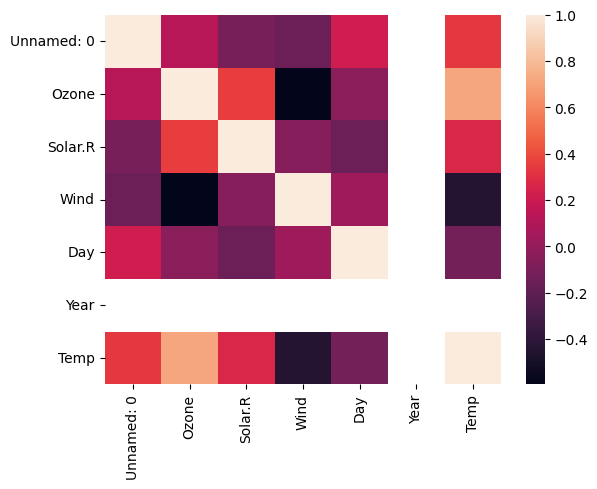

In [66]:
sns.heatmap(df.corr(numeric_only=True))
#check the sidebar on right and see what correlationship exists there
#black color indicates nehative relationship
#-1 strong negative relationship
#1 strong positive relationship
#but identifying this with colors is difficult
#so get the numbers, annotation

<Axes: >

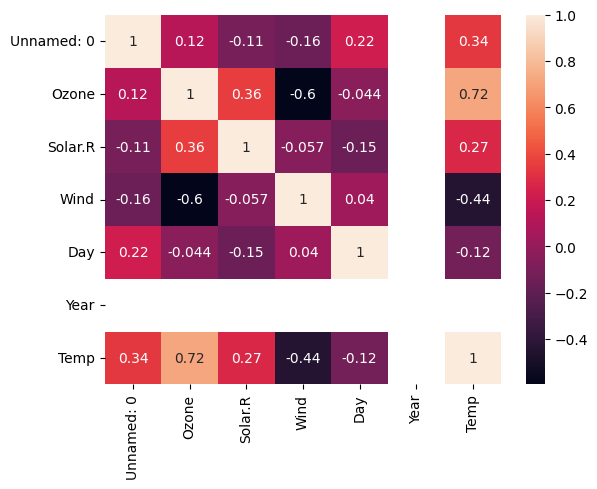

In [67]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: >

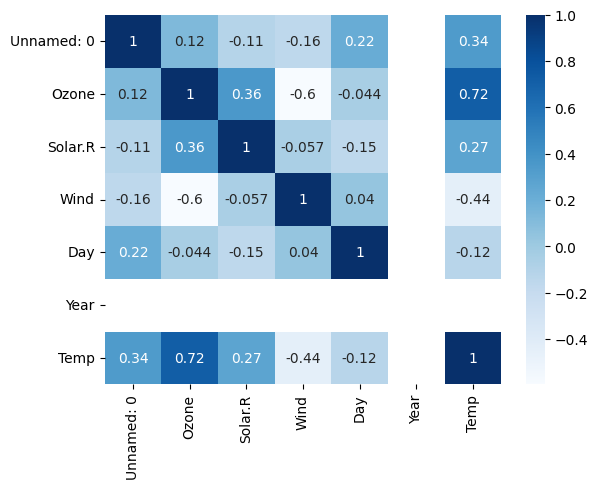

In [68]:
#we can change color combinition
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

Transformations

*   Convert Text data into numeric before model building

In [69]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [70]:
#text column cannot be used in model Building
#convert Text data to numberic before applying logic is called encoding
#get_dummies is from pandas for encoding
# onehotencoding is from seaborn and follows a similar logic

In [80]:
#encoding using Pandas dummy function
df=pd.get_dummies(df,columns=['Weather'])

KeyError: "None of [Index(['Weather'], dtype='object')] are in the [columns]"

Filling Special symbols(which are not identified with isnull()) with NaN

In [81]:
import pandas as pd
import numpy as np

#sample dataset with "?" as missing value

data={
    'Name':['Amit','Neha','Chirag','?'],
    'Age':[25,'?',30,40],
    'Salary':[50000,60000,70000,80000]
}
df=pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
     Name Age  Salary
0    Amit  25   50000
1    Neha   ?   60000
2  Chirag  30   70000
3       ?  40   80000


In [82]:
df.isnull().sum()
#sum only recognizes "NAN" it doesnt recognize symbol

,0
Name,0
Age,0
Salary,0


In [83]:
df.replace('?',np.nan,inplace=True)

/tmp/ipython-input-1615161097.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?',np.nan,inplace=True)


In [84]:
df

,Name,Age,Salary
0,Amit,25.0,50000
1,Neha,NaN,60000
2,Chirag,30.0,70000
3,NaN,40.0,80000


In [85]:
#now replace NA